In [1]:
# Atividade 2

In [10]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts

In [3]:
df = pd.read_csv("dados/dados.csv", sep=";")
df.shape

(187, 4)

In [4]:
df.head()

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10
1,113,SANTO ANGELO,16575.82,800669.92
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80
3,13,CACAPAVA DO SUL,13674.54,485535.86
4,120,SAO GABRIEL,19912.38,533719.86


In [5]:
df.isnull().sum()

CODIGO          0
MUNICIPIO       0
PIB             0
VALOREMPENHO    0
dtype: int64

In [6]:
df[df.duplicated(["CODIGO"], keep=False)]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
18,259,CERRO BRANCO,11961.10,208240.50
19,259,MONTE ALEGRE DOS CAMPOS,11961.10,208240.50
21,259,CERRO BRANCO,12467.25,208240.50
22,259,MONTE ALEGRE DOS CAMPOS,12467.25,208240.50
41,141,DOUTOR MAURICIO CARDOSO,13628.17,147767.38
42,141,TAQUARA,13628.17,147767.38
57,141,DOUTOR MAURICIO CARDOSO,18628.78,147767.38
58,141,TAQUARA,18628.78,147767.38
82,378,MULITERNO,16581.60,97594.98
83,378,SANTO ANTONIO DAS MISSOES,16581.60,97594.98


In [7]:
df.drop_duplicates(subset=["CODIGO"], keep="first", inplace=True)

In [8]:
df[df.duplicated(["CODIGO"], keep=False)]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO


In [9]:
df[df.duplicated(["MUNICIPIO"], keep=False)]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO


In [12]:
var_pib = sts.stdev(df.PIB)
var_pib

17650.23526703751

In [14]:
df.loc[(df["PIB"] >= 2*var_pib)]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
49,149,TRIUNFO,223848.22,1442759.82
91,356,GARRUCHOS,68672.25,271841.26
146,453,MUITOS CAPOES,72353.72,140597.55
155,476,CAPAO DO CIPO,36739.78,60851.00
176,108,SANTA CRUZ DO SUL,40671.53,9637.00


In [27]:
df.describe()

,CODIGO,PIB,VALOREMPENHO
count,172.000000,172.000000,1.720000e+02
mean,242.023256,19888.315407,1.323686e+05
std,140.820277,17650.235267,1.669390e+05
min,1.000000,8236.630000,1.721300e+02
25%,135.000000,13595.255000,5.242277e+04
50%,230.000000,16846.770000,8.347715e+04
75%,364.000000,21334.432500,1.566785e+05
max,496.000000,223848.220000,1.442760e+06


/home/julio/anaconda3/envs/MLpy37/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PIB', ylabel='Density'>

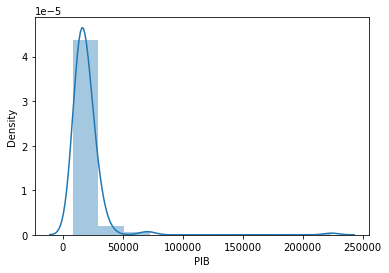

In [16]:
sns.distplot(df.PIB, bins=10)

/home/julio/anaconda3/envs/MLpy37/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='VALOREMPENHO', ylabel='Density'>

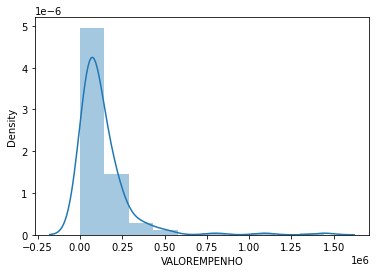

In [17]:
sns.distplot(df.VALOREMPENHO, bins=10)

In [18]:
group = df.sort_values("PIB").head(20)
group = group.iloc[:,1:3]
group

,MUNICIPIO,PIB
88,REDENTORA,8236.63
11,AMARAL FERRADOR,9216.87
15,ENCRUZILHADA DO SUL,10372.80
66,SENTINELA DO SUL,10477.52
89,SAO VALERIO DO SUL,10503.72
6,PIRATINI,10811.67
56,MATA,10935.82
37,SANTANA DA BOA VISTA,11172.34
16,CANGUCU,11213.34
47,JAQUIRANA,11413.37


<AxesSubplot:xlabel='MUNICIPIO'>

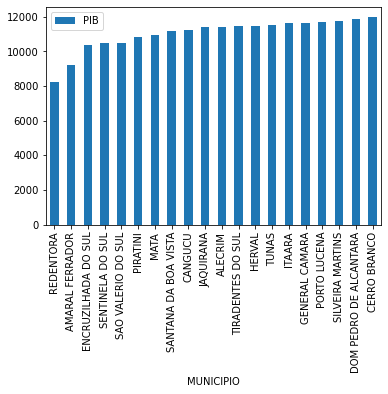

In [19]:
group.plot.bar(x="MUNICIPIO", y="PIB")

In [20]:
group = df.sort_values("VALOREMPENHO").head(20)
group = group.iloc[:,[1,3]]
group

,MUNICIPIO,VALOREMPENHO
186,GUARANI DAS MISSOES,172.13
184,GETULIO VARGAS,233.01
185,NOVA SANTA RITA,310.58
183,SANTA BARBARA DO SUL,365.00
179,MATO LEITAO,760.00
178,SAO SEPE,1186.00
177,IJUI,5920.00
175,PORTO ALEGRE,9358.33
173,SANTA MARIA,9538.34
176,SANTA CRUZ DO SUL,9637.00


<AxesSubplot:xlabel='MUNICIPIO'>

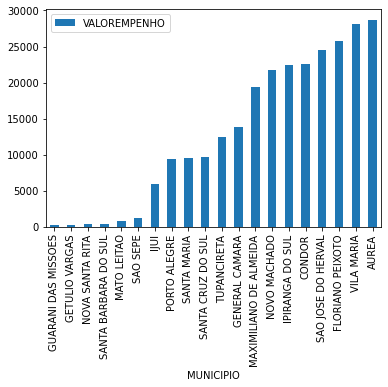

In [21]:
group.plot.bar(x="MUNICIPIO", y="VALOREMPENHO")

In [22]:
group = df.head(20)
group

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10
1,113,SANTO ANGELO,16575.82,800669.92
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80
3,13,CACAPAVA DO SUL,13674.54,485535.86
4,120,SAO GABRIEL,19912.38,533719.86
5,98,QUARAI,12552.51,381286.24
6,95,PIRATINI,10811.67,315884.50
7,325,TUNAS,11543.02,326884.60
8,126,SAO LUIZ GONZAGA,15887.14,385185.68
9,153,URUGUAIANA,21084.19,401124.62


Text(0, 0.5, 'VALOR EMPENHO')

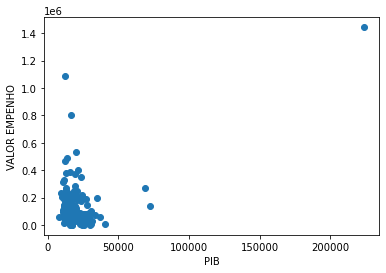

In [26]:
plt.scatter(df.PIB, df.VALOREMPENHO)
plt.xlabel("PIB")
plt.ylabel("VALOR EMPENHO")